Learned Policy:


[2.]	[0.]	[2.]	[1.]	[0.]	[3.]	[0.]	[1.]	[3.]	[0.]	[0.]	[2.]	

[3.]	[0.]	[0.]	[0.]	[1.]	[3.]	[2.]	[2.]	[0.]	[2.]	[1.]	[1.]	

[1.]	[3.]	[0.]	[0.]	[3.]	[3.]	[0.]	[3.]	[3.]	[3.]	[0.]	[2.]	

[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[1.]	

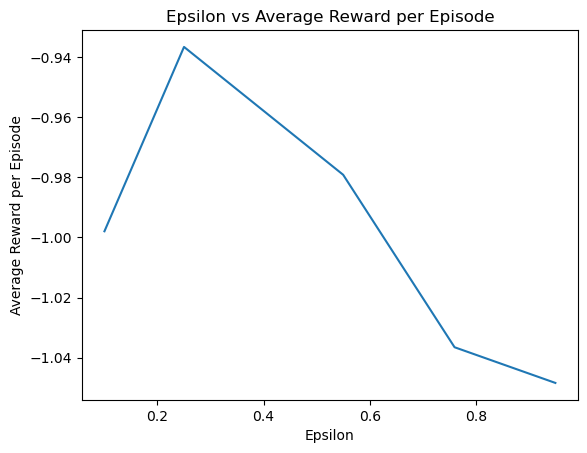

In [ ]:
!pip install pygame
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create environment
env = gym.make('CliffWalking-v0' , render_mode = "rgb_array")

# Initialize Q-table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
alpha = 0.0001
gamma = 0.6
eps_array = [0.95, 0.76, 0.55, 0.25, 0.1]
num_episodes = 100000
start_states = [(3,0), (0,4), (1,7), (2,9)]

# Reset environment
env.reset()
#env.render()

# Set initial state
state = 36

# Track average reward per episode for each epsilon value
avg_rewards = []
rewards = []

# Train the agent
for g in range(len(eps_array)):
    epsilon = eps_array[g]
    total_reward = 0

    # Initialize array to track rewards per episode
    rewards = np.zeros(num_episodes)

    # Loop over episodes
    for e in range(10000):
        action = 0

        # Choose an action either randomly
        action = env.action_space.sample() # Explore action space

        # Take the action and get the new state, reward, and whether the episode is done
        next_state, reward, truncated, terminated, i= env.step(action)
        done = truncated or terminated
        total_reward += reward

        # Update the Q-table if the episode is not done
        if not done:
            new_value = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]))
            q_table[state, action] = new_value

        # Update the current state
        state = next_state

        # Track rewards per episode
        rewards[e] = reward

    # Track average reward per episode for this epsilon value
    avg_reward = np.mean(rewards)
    avg_rewards.append(avg_reward)
   

   
# Derive the policy from the Q-table
policy = np.zeros([env.observation_space.n, 1])
for i in range(env.observation_space.n):
    policy[i] = np.argmax(q_table[i])

# Print the learned policy
print("Learned Policy:")
for i in range(env.observation_space.n):
    if i % 12 == 0:
        print("\n")
    print(policy[i], end="\t")

# Plot epsilon values vs average reward per episode
plt.plot(eps_array, avg_rewards)
plt.title('Epsilon vs Average Reward per Episode')
plt.xlabel('Epsilon')
plt.ylabel('Average Reward per Episode')
plt.show()

